## Step 2: Lexical Analysis

The goal of this step is to explore lexical patterns across three canonical texts
(Eneida, Odyssey, Ulysses) by means of frequency-based lexical analysis.

We focus on:
- overall token frequency
- key recurring lexical items
- lexical fields representing culturally meaningful domains:
  - food
  - alcohol
  - music
  - clothing
  - rituals

This step provides a quantitative foundation for later interpretive,
comparative, and network-based analyses.

In [15]:
from collections import Counter
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Texts are already cleaned
- Tokenization is whitespace-based
- Tokens are stored as plain text (space-separated)

In [2]:
DATA_DIR = Path("../data/processed")

files = {
    "eneida": DATA_DIR / "eneida_clean.txt",
    "odyssey": DATA_DIR / "odyssey_clean.txt",
    "ulysses": DATA_DIR / "ulysses_clean.txt"
}

In [3]:
def load_tokens(path: Path) -> list[str]:
    with open(path, "r", encoding="utf-8") as f:
        return f.read().split()

tokens_by_text = {
    name: load_tokens(path)
    for name, path in files.items()
}

### Token Frequency Analysis

Token frequency analysis allows us to:
- identify dominant lexical units
- detect stylistic density
- compare lexical saturation across texts

In [9]:
stop_words_ukr = {
    'і', 'не', 'на', 'в', 'що', 'з', 'як', 'а', 'та', 'по', 'въ', 'и', 'до', 'у', 'же',
    'якъ', 'зъ', 'щобъ', 'щоб', 'бъ', 'чи', 'це', 'то', 'все', 'так', 'при', 'ад', 
    'від', 'од', 'от', 'ті', 'собі', 'мене', 'його', 'йому', 'іому', 'те', 'ми', 'ви', 'він',
    'хто', 'всіх', 'тутъ', 'такъ', 'тут', 'всѣ', 'за', 'вже', 'який', 'собѣ', 
    'був', 'була', 'було', 'були', 'дуже', 'свої', 'свою', 'тепер', 'тільки', 'хоч', 
    'мов', 'хоть', 'съ', 'їх', 'тебе', 'ти', 'із', 'бо', 'но', 'да', 'без', 'для',
    'де', 'ты', 'коли', 'уже', 'ни', 'изъ', 'всі', 'ихъ', 'бувъ', 'іого', 'мовъ', 'винъ',
    'тамъ', 'сам', 'там', 'къ', 'ажъ', 'себе', 'буде', 'отъ', 'яка', 'яке', 'тїї', 'передь',
    'заразъ', 'зараз', 'трохи', 'ввесь', 'мати', 'може', 'був', 'стала', 'стали', 'нехай',
    'перед', 'через', 'над', 'під', 'біля', 'собі', 'собі', 'мене', 'нас', 'вам', 'вас', 'вся',
    'се', 'цей', 'ним', 'тобѣ', 'имъ', 'зо', 'єсть', 'всѣмъ', 'або', 'сей', 'їм', 'самъ', 'тилько',
    'нам', 'чого', 'безъ', 'собою', 'вона', 'бы', 'ось', 'би', 'треба', 'про', 'всім', 'всякий', 
    'тоді', 'той', 'всю', 'ну', 'всѣхъ', 'свій', 'її', 'них', 'ѣй', 'аж', 'послѣ', 'мы', 'минѣ',
    'лишъ', 'твій', 'кого', 'наш', 'їй', 'вы', 'мій', 'моя', 'таки', 'яки', 'кому', 'жъ', 'які',
    'неї', 'неи', 'нимъ', 'насъ', 'вони', 'між', 'вамъ', 'намъ', 'нею', 'нихъ', 'своихъ', 
    'чѣмъ', 'ще', 'ними', 'того', 'также', 'сама', 'якій', 'сами', 'поки', 'куди', 'лиш', 
    'цим', 'ище', 'своимъ', 'васъ', 'весь', 'нашъ', 'есть', 'ця', 'ваш', 'своїм', 'тож', 
    'предъ', 'сихъ', 'тѣ'
}

stop_words_eng = {
    'the', 'and', 'to', 'of', 'a', 'in', 'he', 'his', 'for', 'that', 'with', 'was', 'as', 
    'it', 'is', 'you', 'him', 'they', 'on', 'me', 'had', 'all', 'my', 'but', 'have', 
    'from', 'at', 'by', 'she', 'her', 'said', 'were', 'be', 'an', 'so', 'their', 'which',
    'not', 'them', 'will', 'this', 'when', 'your', 'who', 'are', 'then', 'or', 'out', 
    'what', 'up', 'like', 'there', 'one', 'would', 'could', 'been', 'about', 'can',
    'if', 'no', 'mr', 'into', 'some', 'more', 'did', 'now', 'its', 'through', 'only',
    'we', 'do', 'has', 'us', 'over', 'too', 'upon', 'may', 'shall', 'should', 'must',
    'went', 'come', 'go', 'came', 'down', 'see', 'after', 'two', 'time', 'man', 'men',
    'own', 'away', 'back', 'well', 'long', 'made', 'take', 'way', 'know', 'than', 'first',
    'any', 'tell', 'here', 'says', 'off', 'yes', 'other', 'those', 'our', 'let', 'much', 
    'am', 'where', 'took', 'while'
}
all_stop_words = stop_words_ukr.union(stop_words_eng)


frequency_by_text_filtered = {}

for name, tokens in tokens_by_text.items():
    filtered_tokens = [t for t in tokens if t not in all_stop_words and len(t) > 1]
    frequency_by_text_filtered[name] = Counter(filtered_tokens)

for name, counter in frequency_by_text_filtered.items():
    print(f"\n{name.upper()} — TOP 10 (Filtered)")
    for word, freq in counter.most_common(10):
        print(f"{word}: {freq}")


ENEIDA — TOP 10 (Filtered)
еней: 190
турн: 76
турна: 54
енея: 48
енею: 46
сказав: 32
ні: 28
землю: 27
добре: 27
троянці: 27

ODYSSEY — TOP 10 (Filtered)
ulysses: 592
house: 401
telemachus: 267
son: 263
suitors: 243
home: 229
ship: 218
father: 209
good: 208
sea: 184

ULYSSES — TOP 10 (Filtered)
bloom: 934
stephen: 504
old: 491
eyes: 329
good: 321
hand: 305
street: 293
little: 290
father: 277
how: 276


### Lexical Fields (Semantic Categories)
Conceptual Motivation

Lexical fields allow us to move from raw frequency
to cultural semantics.

Each field represents a thematic domain recurrent in mythic
and modern narratives.

Important:
These lists are heuristic, not exhaustive.
They can be expanded, refined, or replaced by dictionary-based approaches later.

In [11]:
LEXICAL_FIELDS = {
    "alcohol_and_banquets": [

        "wine", "beer", "whiskey", "whisky", "drunk", "ale", "drink", "cup", "bowl", "feast", 
        "gin", "stout", "guinness", "cider", "porter", "libation", "nectar", "ambrosia",
        "goblet", "chalice", "glass", "pub", "tavern", "bar", "bottle", "drunkard", "sober",
        "sip", "gulp", "toast", "clink", "spirits", "liquor", "brandy", "rum", "punch",

        "горілка", "вино", "мед", "пиво", "сивуха", "чарка", "бенкет", "пити", "слив'янка", 
        "кухоль", "варенуха", "медовуха", "калганка", "калганівка", "настоянка", "наливка", 
        "пунш", "ром", "ратафія", "брага", "сирівець", "оковита", "трунок", "пінна", 
        "трав'яна", "полинівка", "деренівка", "мигдалівка", "айвівка", "перцівка", "вишнівка", 
        "тернівка", "дулівка", "яблучник", "бальзам", "цебер", "ендова", "ковган", "стопа", 
        "корець", "черпак", "келишок", "келих", "кухоль", "кубок", "ріг", "сулія", "барило", 
        "бочка", "кварта", "випити", "хильнути", "перехилити", "пригубити", "наливати", 
        "цмулити", "ковтати", "глушити", "напитися", "п’яниця", "пияк", "пропійця", 
        "хмільний", "захмелілий", "упився", "горілочка", "пивце", "винце", "медок", "сивушка"
    ],
    "food_and_meals": [

        "bread", "meat", "cheese", "honey", "fish", "meal", "eat", "dinner", "supper", "food",
        "breakfast", "beef", "pork", "lamb", "mutton", "kidney", "steak", "sandwich", "slice",
        "butter", "egg", "eggs", "fruit", "apple", "grape", "olive", "oil", "salt", "crust", 
        "roasted", "boiled", "hungry", "appetite", "cook", "kitchen", "fat", "grease",

        "хліб", "сало", "м'ясо", "пироги", "борщ", "каша", "печеня", "страва", "обід", "їсти", 
        "ковбаса", "лемішка", "путря", "куліш", "юшка", "галушки", "вареники", "налисники",
        "пундики", "шулики", "мандрики", "сластьони", "лагомини", "млинці", "оладки", "коржі", 
        "коржики", "книші", "паляниця", "буханці", "пиріжки", "пампушки", "маківник", "медівник",
        "калач", "бублик", "сухар", "пряник", "шинка", "кров’янка", "печінка", "нирки", 
        "телятина", "свинина", "баранина", "яловичина", "курятина", "індик", "качка", "гуска",
        "оселедець", "короп", "щука", "тараня", "таранька", "в’юн", "холодець", "смаженина",
        "гречка", "пшоно", "ячмінь", "горох", "квасоля", "ріпа", "буряк", "морква", "капуста", 
        "картопля", "огірки", "квашенина", "часник", "цибуля", "молоко", "кисляк", "ряжанка", 
        "сироватка", "бринза", "сметана", "масло", "сир", "харчі", "їдло", "їжа", "наїдки", 
        "пожива", "гостинці", "гостинець", "зубці", "вечеря", "сніданок", "хлібъ", "сальця"
    ],
    "clothing_and_fashion": [

        "cloak", "robe", "dress", "garment", "coat", "shirt", "hat", "shoes", "boots", "tunic", 
        "veil", "sandals", "belt", "girdle", "linen", "wool", "silk", "mantle", "cap", "trousers", 
        "gloves", "breeches", "waistcoat", "spectacles", "tie", "button", "suit", "clothes", "attire",

        "одяг", "сорочка", "штани", "шаровари", "жупан", "свита", "кожух", "кирея", "корсет", 
        "юпка", "плахта", "запаска", "пояс", "черес", "шапка", "бриль", "чоботи", "постоли", 
        "каптан", "очіпок", "хустка", "стрічки", "намисто", "дукати", "кишеня", "свитка",
        "кобеняк", "сіряк", "опанча", "кунтуш", "шевні", "гатті", "корсетка", "одежа", "вбрання"
    ],
    "music_and_performance": [

        "music", "song", "sing", "dance", "lyre", "harp", "flute", "voice", "melody", "rhythm", 
        "hymn", "chorus", "opera", "piano", "organ", "concert", "singer", "player", "instrument", 
        "sound", "tune", "perform", "stage", "theatre", "bard", "minstrel", "lute", "drum",

        "музика", "пісня", "співати", "танцювати", "кобза", "бандура", "сопілка", "скрипка", 
        "цимбали", "бубон", "гуслі", "дуда", "торбан", "свисток", "трембіта", "співи", "танці", 
        "гопак", "метелиця", "козачок", "весільна", "пісенька", "голос", "грати", "кобзар", 
        "хор", "ірмос", "псалом", "гусла", "сопілочка"
    ],
    "sea_and_travel": [

        "sea", "ship", "boat", "sail", "wave", "shore", "journey", "island", "ocean", "water",
        "beach", "harbor", "port", "mast", "oar", "row", "anchor", "navigation", "tide", "coast",
        "voyage", "travel", "vessel", "captain", "sailor", "mariner", "fleet", "raft", "deck",

        "море", "човен", "корабель", "хвилі", "берег", "дорога", "шлях", "пливти", "вода", 
        "весло", "парус", "вітрило", "пристань", "буря", "хвиля", "морський", "плавання", "морем"
    ],
    "religion_and_myth": [

        "god", "gods", "altar", "sacrifice", "prayer", "temple", "priest", "holy", "divine",
        "goddess", "heaven", "hell", "spirit", "soul", "worship", "fate", "oracle", "blessing",
        "curse", "immortal", "mortal", "sin", "ghost", "shrine", "omen", "offering",

        "бог", "боги", "жертва", "вівтар", "молитва", "храм", "церква", "святий", "поп", 
        "рай", "пекло", "чорт", "диявол", "гріх", "душа", "віра", "пророк", "ворожка", 
        "відьма", "закляття", "богиня", "олімп", "зевс", "венера", "юнона", "нептун", "ангел"
    ],
    "language_and_education": [

        "latin", "school", "university", "college", "teacher", "master", "student", "grammar",
        "rhetoric", "philosophy", "poetry", "library", "book", "read", "write", "scholar",
        "clerk", "official", "office", "paper", "script", "lesson", "greek", "hebrew",
   
        "латина", "школа", "бурса", "пиворіз", "граматика", "риторика", "піїтика", "семінарія",
        "учитель", "спудей", "школяр", "бакалавр", "верші", "латинський", "канцелярія", "писар",
        "чиновник", "ранг", "указ", "папір", "грамота", "книга", "читати", "писати", "письмо"
    ]
}

### Compute Lexical Field Frequencies
Method

For each text:
- iterate over lexical fields
- sum frequencies of all words belonging to the field

In [12]:
lexical_stats = []

for text_name, counter in frequency_by_text_filtered.items():
    for field_name, words in LEXICAL_FIELDS.items():
        for word in words:
            if word in counter:
                lexical_stats.append({
                    "text": text_name,
                    "field": field_name,
                    "word": word,
                    "frequency": counter[word]
                })

df_lexical = pd.DataFrame(lexical_stats)


total_counts = {name: sum(c.values()) for name, c in frequency_by_text_filtered.items()}
df_lexical['relative_frequency'] = df_lexical.apply(
    lambda row: (row['frequency'] / total_counts[row['text']]) * 1000, axis=1
)

print("First result of the analysis:")
display(df_lexical.head(10))

First result of the analysis:


,text,field,word,frequency,relative_frequency
0,eneida,alcohol_and_banquets,горілка,2,0.098658
1,eneida,alcohol_and_banquets,мед,5,0.246646
2,eneida,alcohol_and_banquets,пиво,3,0.147987
3,eneida,alcohol_and_banquets,сивуха,2,0.098658
4,eneida,alcohol_and_banquets,пити,2,0.098658
5,eneida,alcohol_and_banquets,барило,1,0.049329
6,eneida,alcohol_and_banquets,пивце,1,0.049329
7,eneida,alcohol_and_banquets,винце,1,0.049329
8,eneida,alcohol_and_banquets,медок,1,0.049329
9,eneida,food_and_meals,хліб,1,0.049329


### Save Results to CSV

In [13]:
df_summary = df_lexical.groupby(['text', 'field'])['frequency'].sum().unstack(level=0).fillna(0)

print("\nTotal number of words by category:")
display(df_summary)

OUTPUT_PATH = DATA_DIR / "lexical_field_stats.csv"
df_lexical.to_csv(OUTPUT_PATH, index=False)
print(f"\n The data is stored in: {OUTPUT_PATH}")


Total number of words by category:


text,eneida,odyssey,ulysses
field,,,
alcohol_and_banquets,18,280,478
clothing_and_fashion,10,192,696
food_and_meals,27,358,596
language_and_education,23,131,693
music_and_performance,8,123,562
religion_and_myth,93,651,705
sea_and_travel,20,879,494



 The data is stored in: ..\data\processed\lexical_field_stats.csv


### Global Comparison: Thematic Profiles of the Texts

To obtain a high-level comparative overview, we aggregate lexical frequencies
within each semantic field and compare their distribution across the three texts.

This visualization serves several purposes:

- it reveals dominant cultural and thematic domains in each work
- it allows comparison between mythological, epic, and modernist narratives
- it highlights shifts in thematic emphasis across historical and literary contexts

Absolute frequencies are used at this stage to illustrate overall thematic weight,
while relative frequencies are considered in later interpretive steps.

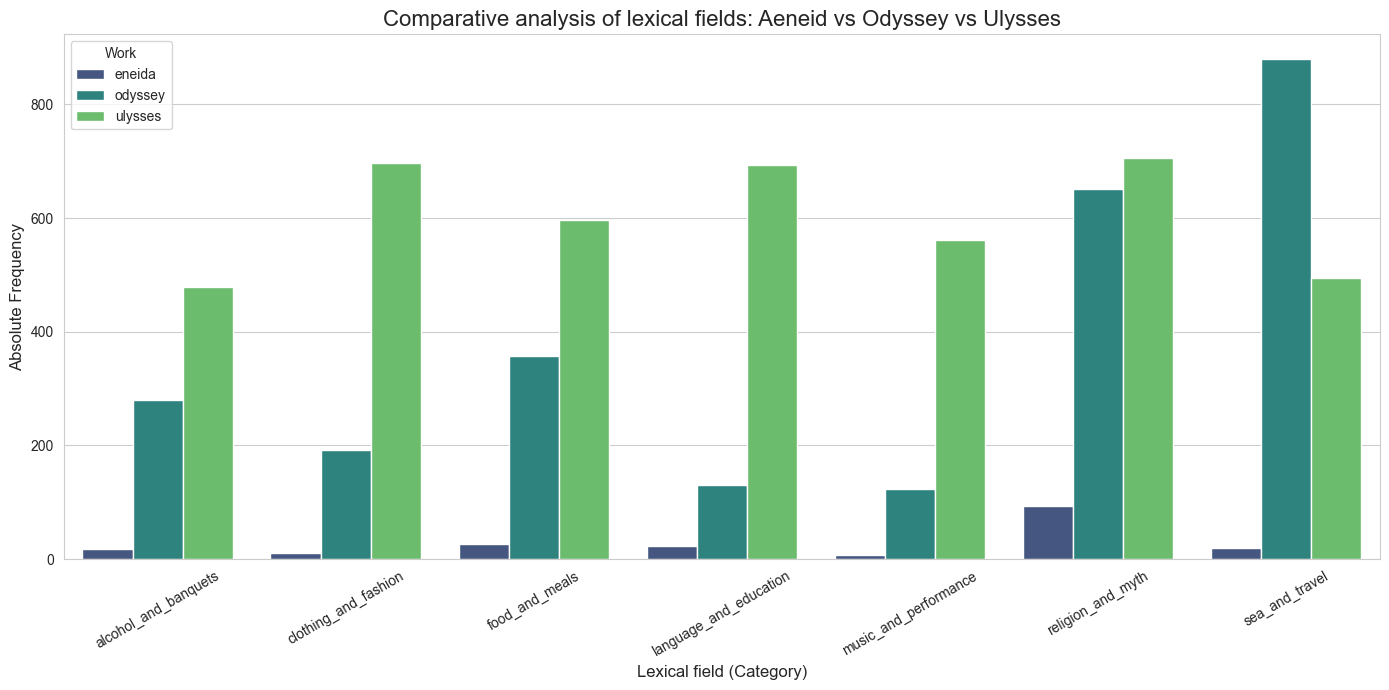

In [17]:
# 1. Глобальне порівняння: Тематичний профіль текстів
# Використовуємо сумарну частоту по полях для кожного тексту
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

# Створюємо зведену таблицю для візуалізації
df_category_total = df_lexical.groupby(['text', 'field'])['frequency'].sum().reset_index()

# Будуємо груповий бар-чарт
ax = sns.barplot(data=df_category_total, x='field', y='frequency', hue='text', palette='viridis')

plt.title('Comparative analysis of lexical fields: Aeneid vs Odyssey vs Ulysses', fontsize=16)
plt.xlabel('Lexical field (Category)', fontsize=12)
plt.ylabel('Absolute Frequency', fontsize=12)
plt.xticks(rotation=30)
plt.legend(title='Work')
plt.tight_layout()
plt.show()

### Lexical Detail: Key Tokens within Semantic Fields

While aggregated category frequencies provide a macroscopic view,
they may obscure important internal differences within each lexical field.

To address this, we examine the most frequent lexical items
(top-15 per category) for each text separately.

This micro-level analysis allows us to:

- identify culturally specific vocabulary
- observe stylistic preferences
- distinguish between shared semantic domains and divergent lexical realizations

Together, these plots complement the global thematic profile
with fine-grained lexical evidence.

C:\Users\grasd\AppData\Local\Temp\ipykernel_6324\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')
C:\Users\grasd\AppData\Local\Temp\ipykernel_6324\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')
C:\Users\grasd\AppData\Local\Temp\ipykernel_6324\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')


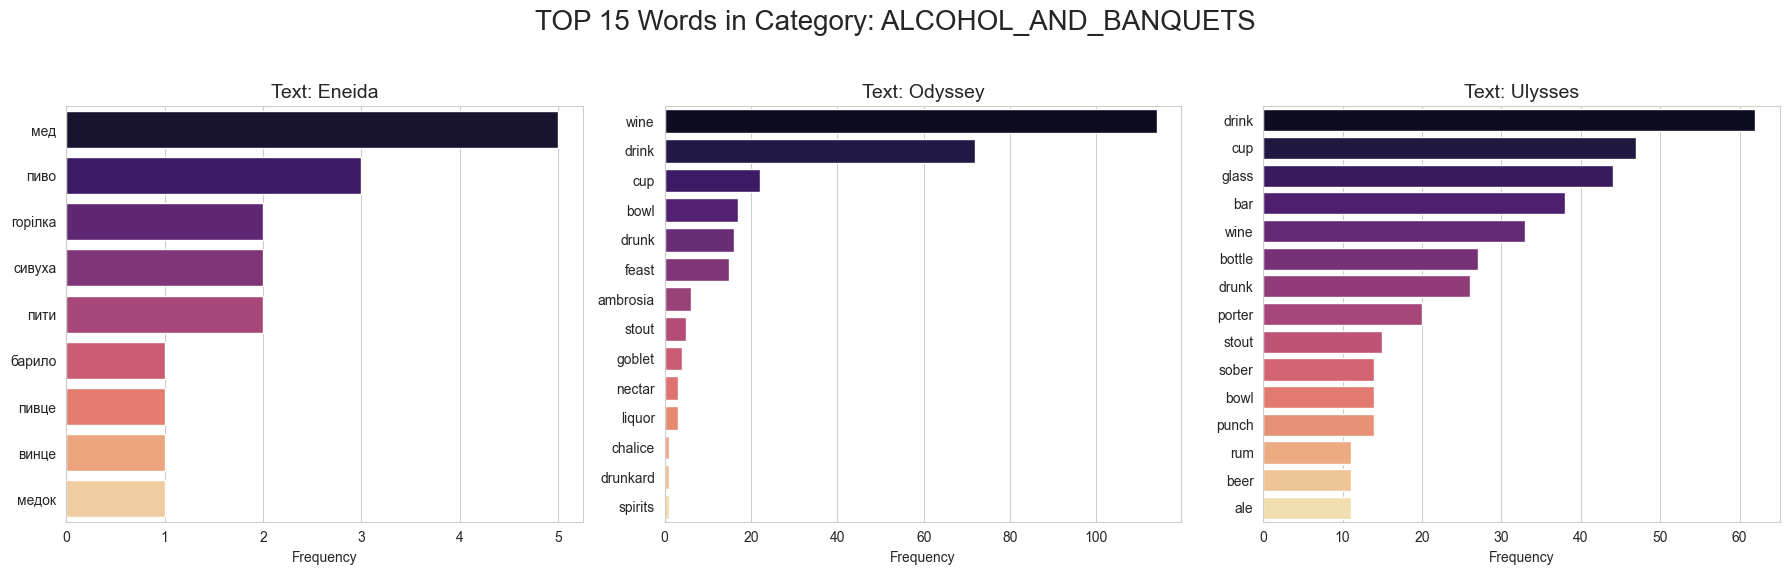

C:\Users\grasd\AppData\Local\Temp\ipykernel_6324\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')
C:\Users\grasd\AppData\Local\Temp\ipykernel_6324\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')
C:\Users\grasd\AppData\Local\Temp\ipykernel_6324\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')


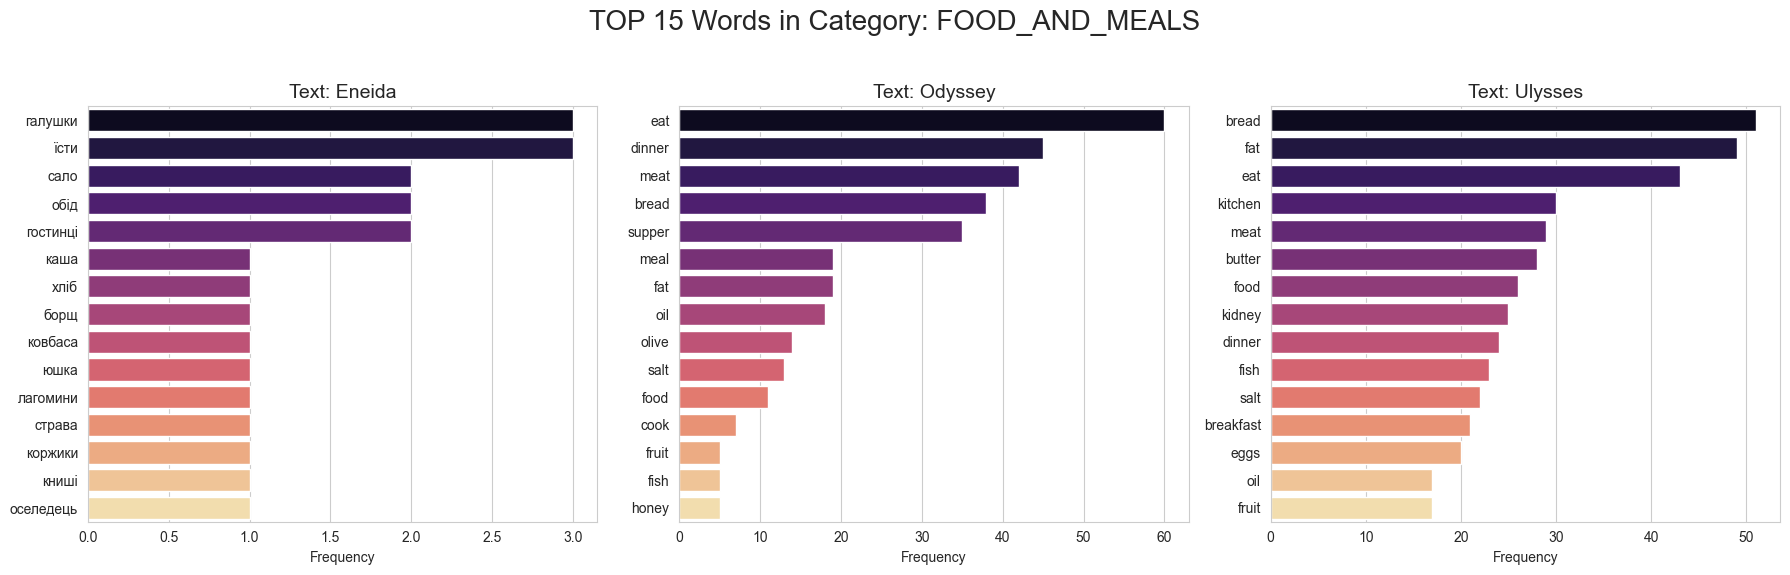

C:\Users\grasd\AppData\Local\Temp\ipykernel_6324\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')
C:\Users\grasd\AppData\Local\Temp\ipykernel_6324\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')
C:\Users\grasd\AppData\Local\Temp\ipykernel_6324\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')


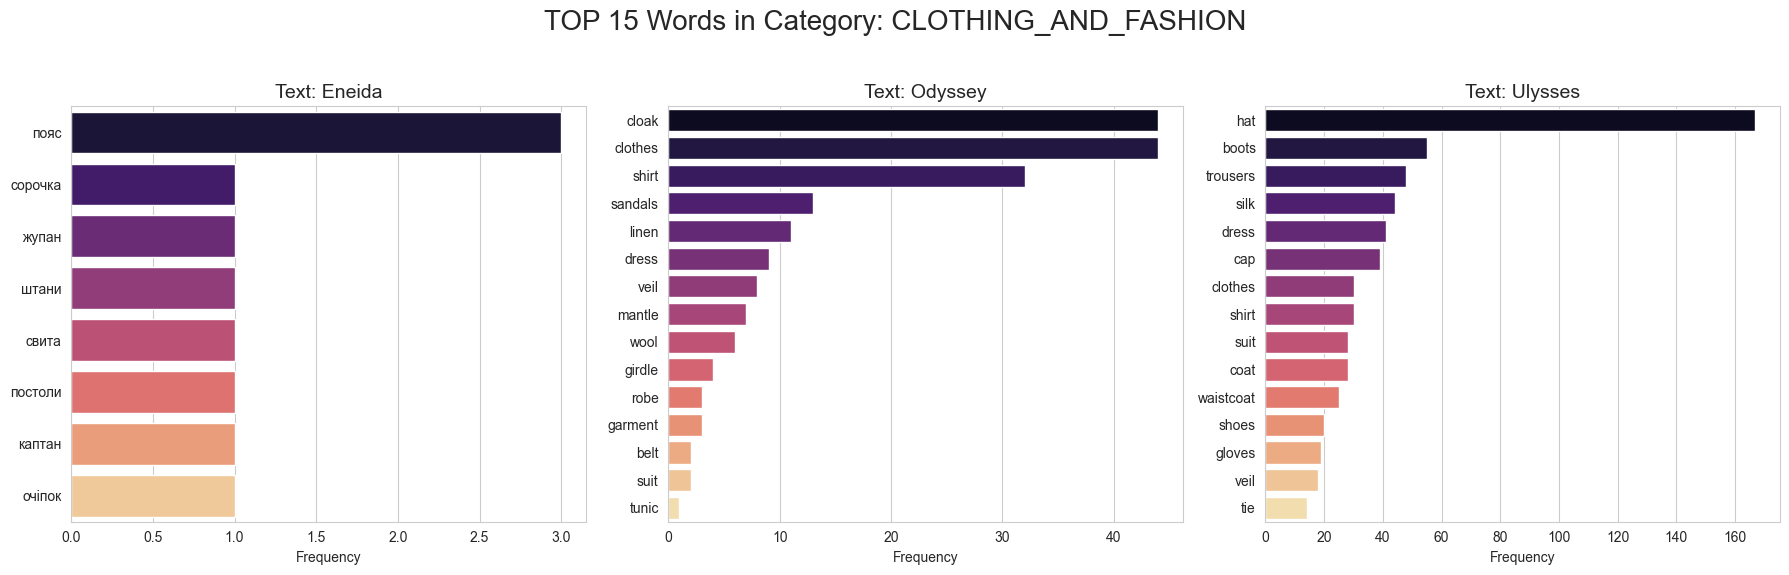

C:\Users\grasd\AppData\Local\Temp\ipykernel_6324\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')
C:\Users\grasd\AppData\Local\Temp\ipykernel_6324\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')
C:\Users\grasd\AppData\Local\Temp\ipykernel_6324\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')


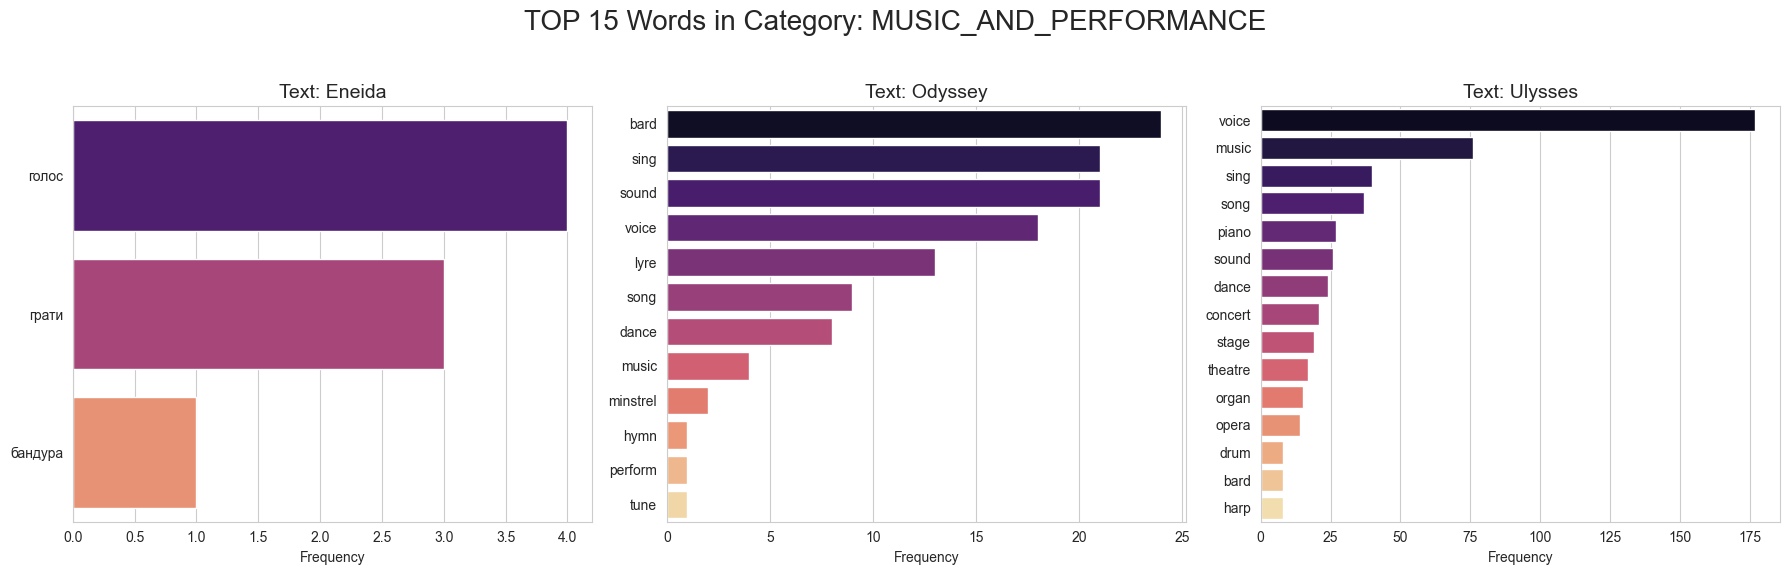

C:\Users\grasd\AppData\Local\Temp\ipykernel_6324\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')
C:\Users\grasd\AppData\Local\Temp\ipykernel_6324\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')
C:\Users\grasd\AppData\Local\Temp\ipykernel_6324\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')


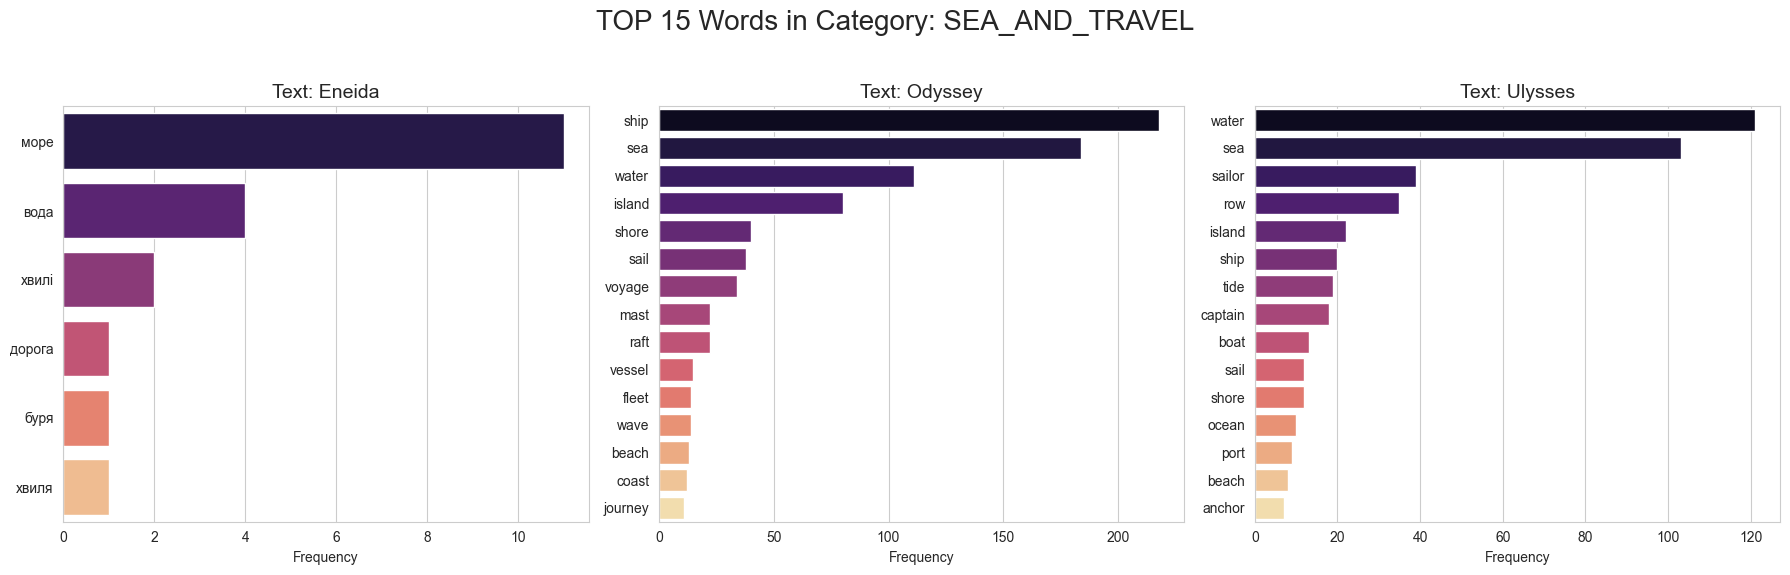

C:\Users\grasd\AppData\Local\Temp\ipykernel_6324\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')
C:\Users\grasd\AppData\Local\Temp\ipykernel_6324\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')
C:\Users\grasd\AppData\Local\Temp\ipykernel_6324\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')


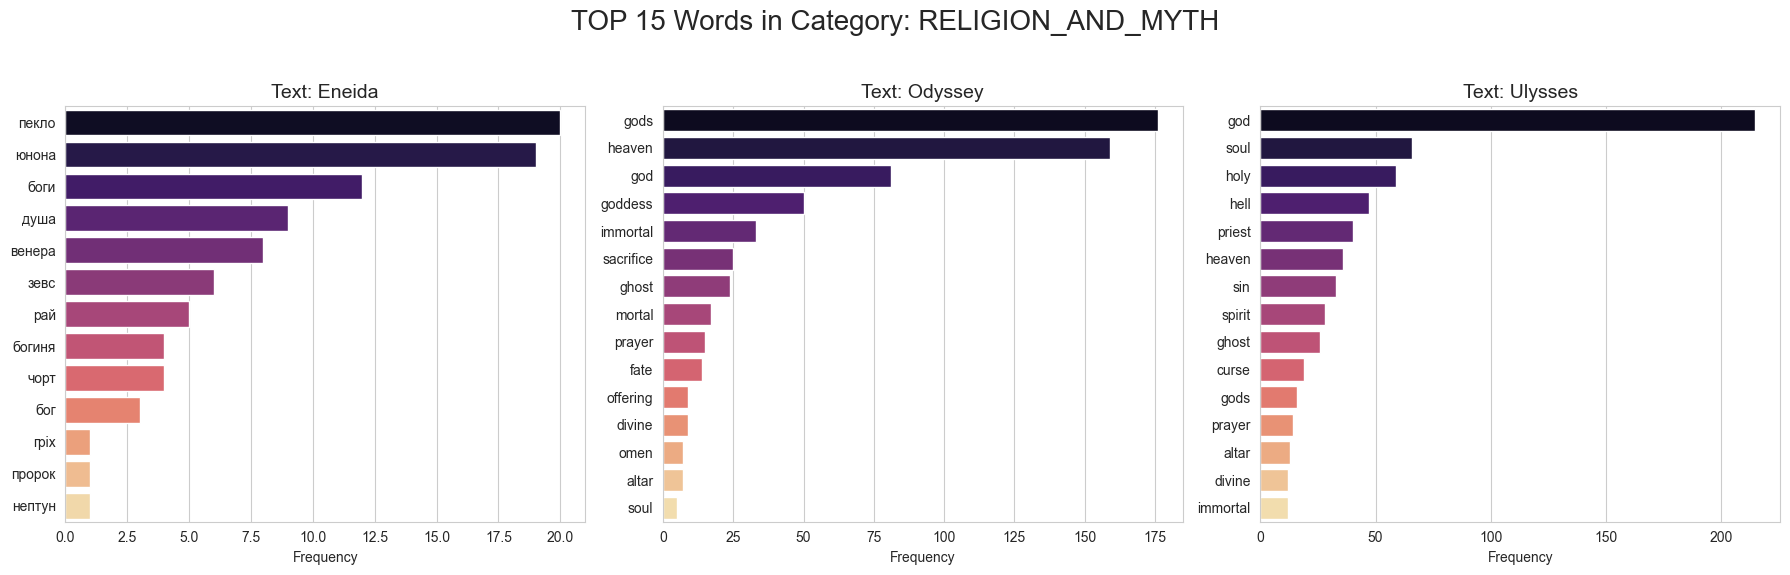

C:\Users\grasd\AppData\Local\Temp\ipykernel_6324\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')
C:\Users\grasd\AppData\Local\Temp\ipykernel_6324\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')
C:\Users\grasd\AppData\Local\Temp\ipykernel_6324\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')


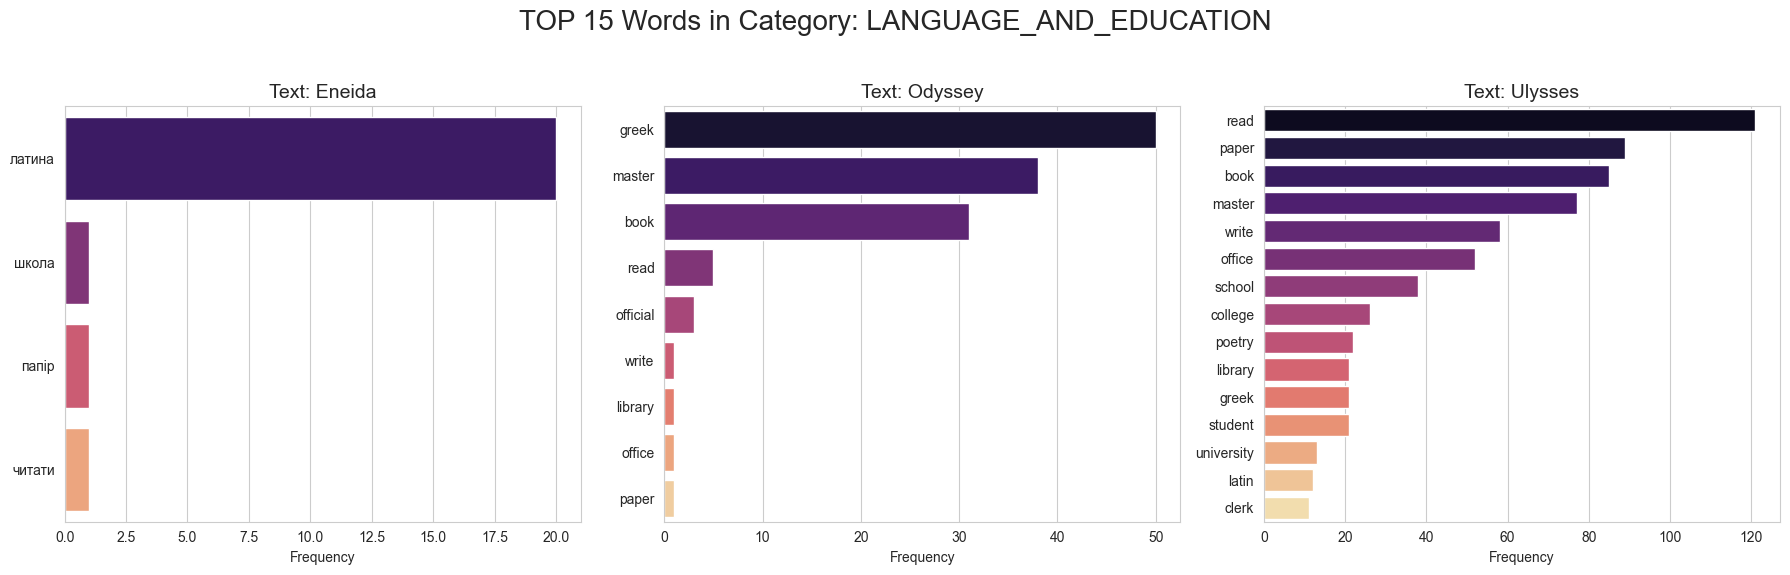

In [18]:
# 2. Деталізація: Топ-15 слів для кожної категорії (порівняння)
def plot_comparative_top(df, field_name, top_n=15):
    """
    Draws top keywords for a specific category for all three texts next to each other.
    """
    subset = df[df["field"] == field_name]
    
    # Створюємо сітку графіків (1 рядок, 3 колонки)
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
    fig.suptitle(f'TOP {top_n} Words in Category: {field_name.upper()}', fontsize=20)

    texts = df['text'].unique()
    for i, text in enumerate(texts):
        data = subset[subset['text'] == text].sort_values("frequency", ascending=False).head(top_n)
        
        if not data.empty:
            sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')
            axes[i].set_title(f'Text: {text.capitalize()}', fontsize=14)
            axes[i].set_xlabel('Frequency')
            axes[i].set_ylabel('')
        else:
            axes[i].set_title(f'{text.capitalize()} (No data)')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Автоматично отримуємо список усіх категорій, які є в даних (їх буде 7)
all_fields = df_lexical["field"].unique()

for field in all_fields:
    plot_comparative_top(df_lexical, field)